## Data Bootcamp Final Project


*Problem Statement*<br>
Diabetes is one of the most prevalent chronic diseases in the United States.  The Centers for Disease Control and Prevention has indicated that as of 2018, 34.2 million Americans have diabetes and 88 million have prediabetes. Furthermore, the CDC estimates that 1 in 5 diabetics, and roughly 8 in 10 prediabetics are unaware of their risk. Although certain risk factors such as obesity and age are well established for diabetes, others remain to be identified. **Therefore, this project aims to build classification models that predict diabetes. Additionally, this project seeks to confirm well-known risk factors for diabetes and also identify new risk factors/ features that might be predictive of diabetes risk.** <br>

While there is no cure for diabetes, strategies like losing weight, eating healthily, being active, and receiving medical treatments can mitigate the harms of this disease in many patients. Early diagnosis can lead to lifestyle changes and more effective treatment, making predictive models for diabetes risk important tools for public and public health officials.

*Dataset*<br>
The dataset used in this project is the **BRFSS 2022 dataset** released by the CDC.The Behavioral Risk Factor Surveillance System (BRFSS) is the nation’s premier system of health-related telephone surveys that collect state data about U.S. residents regarding their health-related risk behaviors, chronic health conditions, and use of preventive services. Established in 1984 with 15 states, BRFSS now collects data in all 50 states as well as the District of Columbia and three U.S. territories. 


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay 
from sklearn.compose import make_column_transformer 
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score

In [4]:
!pip install pandas
!pip install sas7bdat


  Preparing metadata (setup.py) ... done
  Created wheel for sas7bdat: filename=sas7bdat-2.2.3-py3-none-any.whl size=16294 sha256=3dbc44deb565e36c4a0b4f8b2a37afc6e4e4e1b4bed9a8bfe82d2da8b0667aba
  Stored in directory: /Users/srikari/Library/Caches/pip/wheels/9a/95/86/436431e285591df3980accd5137b3e24f142914036bcb159d8
Successfully built sas7bdat


In [9]:
#import dataset and convert it from SAS to CSV format
import pandas as pd

# Specify the path to your SAS data file
sas_file_path = '/Users/srikari/Downloads/LLCP2022.XPT '

# Read SAS file directly using pandas
sas_data = pd.read_sas(sas_file_path, format='xport')

# Specify the path for the CSV output file
csv_file_path = '/Users/srikari/Desktop/file.csv'

# Save the data as a CSV file
sas_data.to_csv(csv_file_path, index=False)

print(f"SAS file '{sas_file_path}' has been converted to CSV: '{csv_file_path}'")



/var/folders/df/f149pzpx1zl9fhyh13cd4wl40000gn/T/ipykernel_14046/664440381.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sas_data = pd.read_sas(sas_file_path, format='xport')
/var/folders/df/f149pzpx1zl9fhyh13cd4wl40000gn/T/ipykernel_14046/664440381.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sas_data = pd.read_sas(sas_file_path, format='xport')
/var/folders/df/f149pzpx1zl9fhyh13cd4wl40000gn/T/ipykernel_14046/664440381.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling 

SAS file '/Users/srikari/Downloads/LLCP2022.XPT ' has been converted to CSV: '/Users/srikari/Desktop/file.csv'


In [11]:
#read the csv file
df=pd.read_csv('/Users/srikari/Desktop/file.csv')

In [13]:
#inspect dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445132 entries, 0 to 445131
Columns: 328 entries, _STATE to _AIDTST4
dtypes: float64(323), object(5)
memory usage: 1.1+ GB


In [14]:
df.head()

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,...,_SMOKGRP,_LCSREC,DRNKANY6,DROCDY4_,_RFBING6,_DRNKWK2,_RFDRHV8,_FLSHOT7,_PNEUMO3,_AIDTST4
0,1.0,1.0,b'02032022',b'02',b'03',b'2022',1100.0,b'2022000001',2.022000e+09,1.0,...,4.0,NaN,2.0,5.397605e-79,1.0,5.397605e-79,1.0,1.0,2.0,2.0
1,1.0,1.0,b'02042022',b'02',b'04',b'2022',1100.0,b'2022000002',2.022000e+09,1.0,...,4.0,NaN,2.0,5.397605e-79,1.0,5.397605e-79,1.0,2.0,2.0,2.0
2,1.0,1.0,b'02022022',b'02',b'02',b'2022',1100.0,b'2022000003',2.022000e+09,1.0,...,4.0,NaN,2.0,5.397605e-79,1.0,5.397605e-79,1.0,NaN,NaN,2.0
3,1.0,1.0,b'02032022',b'02',b'03',b'2022',1100.0,b'2022000004',2.022000e+09,1.0,...,3.0,2.0,2.0,5.397605e-79,1.0,5.397605e-79,1.0,9.0,9.0,2.0
4,1.0,1.0,b'02022022',b'02',b'02',b'2022',1100.0,b'2022000005',2.022000e+09,1.0,...,4.0,NaN,1.0,1.000000e+01,1.0,1.400000e+02,1.0,NaN,NaN,2.0


In [15]:
pd.set_option('display.max_columns', 500)
df.head()

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,PVTRESD1,COLGHOUS,STATERE1,CELPHON1,LADULT1,COLGSEX1,NUMADULT,LANDSEX1,NUMMEN,NUMWOMEN,RESPSLCT,SAFETIME,CTELNUM1,CELLFON5,CADULT1,CELLSEX1,PVTRESD3,CCLGHOUS,CSTATE1,LANDLINE,HHADULT,SEXVAR,GENHLTH,PHYSHLTH,MENTHLTH,POORHLTH,PRIMINSR,PERSDOC3,MEDCOST1,CHECKUP1,EXERANY2,SLEPTIM1,LASTDEN4,RMVTETH4,CVDINFR4,CVDCRHD4,CVDSTRK3,ASTHMA3,ASTHNOW,CHCSCNC1,CHCOCNC1,CHCCOPD3,ADDEPEV3,CHCKDNY2,HAVARTH4,DIABETE4,DIABAGE4,MARITAL,EDUCA,RENTHOM1,NUMHHOL4,NUMPHON4,CPDEMO1C,VETERAN3,EMPLOY1,CHILDREN,INCOME3,PREGNANT,WEIGHT2,HEIGHT3,DEAF,BLIND,DECIDE,DIFFWALK,DIFFDRES,DIFFALON,HADMAM,HOWLONG,CERVSCRN,CRVCLCNC,CRVCLPAP,CRVCLHPV,HADHYST2,HADSIGM4,COLNSIGM,COLNTES1,SIGMTES1,LASTSIG4,COLNCNCR,VIRCOLO1,VCLNTES2,SMALSTOL,STOLTEST,STOOLDN2,BLDSTFIT,SDNATES1,SMOKE100,SMOKDAY2,USENOW3,ECIGNOW2,LCSFIRST,LCSLAST,LCSNUMCG,LCSCTSC1,LCSSCNCR,LCSCTWHN,ALCDAY4,AVEDRNK3,DRNK3GE5,MAXDRNKS,FLUSHOT7,FLSHTMY3,PNEUVAC4,TETANUS1,HIVTST7,HIVTSTD3,HIVRISK5,COVIDPOS,COVIDSMP,COVIDPRM,PDIABTS1,PREDIAB2,DIABTYPE,INSULIN1,CHKHEMO3,EYEEXAM1,DIABEYE1,DIABEDU1,FEETSORE,TOLDCFS,HAVECFS,WORKCFS,IMFVPLA3,HPVADVC4,HPVADSHT,SHINGLE2,COVIDVA1,COVACGET,COVIDNU1,COVIDINT,COVIDFS1,COVIDSE1,COPDCOGH,COPDFLEM,COPDBRTH,COPDBTST,COPDSMOK,CNCRDIFF,CNCRAGE,CNCRTYP2,CSRVTRT3,CSRVDOC1,CSRVSUM,CSRVRTRN,CSRVINST,CSRVINSR,CSRVDEIN,CSRVCLIN,CSRVPAIN,CSRVCTL2,PSATEST1,PSATIME1,PCPSARS2,PSASUGST,PCSTALK1,CIMEMLOS,CDHOUSE,CDASSIST,CDHELP,CDSOCIAL,CDDISCUS,CAREGIV1,CRGVREL4,CRGVLNG1,CRGVHRS1,CRGVPRB3,CRGVALZD,CRGVPER1,CRGVHOU1,CRGVEXPT,ACEDEPRS,ACEDRINK,ACEDRUGS,ACEPRISN,ACEDIVRC,ACEPUNCH,ACEHURT1,ACESWEAR,ACETOUCH,ACETTHEM,ACEHVSEX,ACEADSAF,ACEADNED,LSATISFY,EMTSUPRT,SDHISOLT,SDHEMPLY,FOODSTMP,SDHFOOD1,SDHBILLS,SDHUTILS,SDHTRNSP,SDHSTRE1,MARIJAN1,MARJSMOK,MARJEAT,MARJVAPE,MARJDAB,MARJOTHR,USEMRJN4,LASTSMK2,STOPSMK2,MENTCIGS,MENTECIG,HEATTBCO,ASBIALCH,ASBIDRNK,ASBIBING,ASBIADVC,ASBIRDUC,FIREARM5,GUNLOAD,LOADULK2,RCSGEND1,RCSXBRTH,RCSRLTN2,CASTHDX2,CASTHNO2,BIRTHSEX,SOMALE,SOFEMALE,TRNSGNDR,HADSEX,PFPPRVN4,TYPCNTR9,BRTHCNT4,WHEREGET,NOBCUSE8,BCPREFER,RRCLASS3,RRCOGNT2,RRTREAT,RRATWRK2,RRHCARE4,RRPHYSM2,QSTVER,QSTLANG,_METSTAT,_URBSTAT,MSCODE,_STSTR,_STRWT,_RAWRAKE,_WT2RAKE,_IMPRACE,_CHISPNC,_CRACE2,_CPRACE2,CAGEG,_CLLCPWT,_DUALUSE,_DUALCOR,_LLCPWT2,_LLCPWT,_RFHLTH,_PHYS14D,_MENT14D,_HLTHPLN,_HCVU652,_TOTINDA,_EXTETH3,_ALTETH3,_DENVST3,_MICHD,_LTASTH1,_CASTHM1,_ASTHMS1,_DRDXAR2,_PRACE2,_MRACE2,_HISPANC,_RACE1,_RACEG22,_RACEGR4,_RACEPR1,_SEX,_AGEG5YR,_AGE65YR,_AGE80,_AGE_G,HTIN4,HTM4,WTKG3,_BMI5,_BMI5CAT,_RFBMI5,_CHLDCNT,_EDUCAG,_INCOMG1,_RFMAM22,_MAM5023,_HADCOLN,_CLNSCP1,_HADSIGM,_SGMSCP1,_SGMS101,_RFBLDS5,_STOLDN1,_VIRCOL1,_SBONTI1,_CRCREC2,_SMOKER3,_RFSMOK3,_CURECI2,_YRSSMOK,_PACKDAY,_PACKYRS,_YRSQUIT,_SMOKGRP,_LCSREC,DRNKANY6,DROCDY4_,_RFBING6,_DRNKWK2,_RFDRHV8,_FLSHOT7,_PNEUMO3,_AIDTST4
0,1.0,1.0,b'02032022',b'02',b'03',b'2022',1100.0,b'2022000001',2.022000e+09,1.0,1.0,NaN,1.0,2.0,1.0,NaN,2.0,NaN,1.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,88.0,88.0,NaN,99.0,1.0,2.0,1.0,2.0,8.0,NaN,NaN,2.0,2.0,2.0,2.0,NaN,2.0,2.0,2.0,2.0,2.0,2.0,1.0,80.0,1.0,6.0,1.0,1.0,1.0,2.0,2.0,7.0,88.0,99.0,NaN,9999.0,9999.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,NaN,NaN,NaN,2.0,1.0,3.0,2.0,3.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,3.0,4.0,NaN,NaN,NaN,2.0,NaN,NaN,888.0,NaN,NaN,NaN,1.0,92021.0,2.0,3.0,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,5.0,2.0,2.0,5.0,2.0,2.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,1.0,1.0,1.0,2.0,11011.0,37.418416,2.0,74.836832,1.0,9.0,NaN,NaN,NaN,NaN,1.0,0.520383,813.918517,487.612985,1.0,1.0,1.0,9.0,

This dataset has 328 columns but based on diabetes research regarding factors influencing diabetes disease, it makes sense to use only select features in this analysis. <br>
Research in the field has identified the following as important risk factors for diabetes(not in strict order of importance):<br>

Smoking,
Obesity,
Age,
Sex,
Race,
Exercise,
alcohol consumption,
Other chronic health conditions,
BMI,
Household Income,
Marital Status,
Sleep,
Time since last checkup,
Education,
Health care coverage,
Mental Health<br>

Given these risk factors, I will select features (columns) in the BRFSS datset related to these risk factors. To help understand what the columns mean, I consulted the BRFSS 2022 Codebook to see the questions and information about the questions. I tried to match the variable names in the codebook to the variable names in the dataset I downloaded from the website. 



In [52]:
#select specific columns and create new dataset
df_selected= df[['DIABETE4','SMOKE100','_BMI5','CVDSTRK3', 'CVDINFR4','EXERANY2','_RFDRHV8','GENHLTH','MEDCOST1','PRIMINSR','MENTHLTH', 'PHYSHLTH', 'DIFFWALK','SEXVAR','_AGEG5YR','EDUCA','INCOME3', 'BLIND','CHCKDNY2' ]]

In [53]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445132 entries, 0 to 445131
Data columns (total 19 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   DIABETE4  445129 non-null  float64
 1   SMOKE100  413355 non-null  float64
 2   _BMI5     396326 non-null  float64
 3   CVDSTRK3  445130 non-null  float64
 4   CVDINFR4  445128 non-null  float64
 5   EXERANY2  445130 non-null  float64
 6   _RFDRHV8  445132 non-null  float64
 7   GENHLTH   445129 non-null  float64
 8   MEDCOST1  445128 non-null  float64
 9   PRIMINSR  445128 non-null  float64
 10  MENTHLTH  445129 non-null  float64
 11  PHYSHLTH  445127 non-null  float64
 12  DIFFWALK  422977 non-null  float64
 13  SEXVAR    445132 non-null  float64
 14  _AGEG5YR  445132 non-null  float64
 15  EDUCA     445127 non-null  float64
 16  INCOME3   432200 non-null  float64
 17  BLIND     425277 non-null  float64
 18  CHCKDNY2  445130 non-null  float64
dtypes: float64(19)
memory usage: 64.5 MB


In [55]:
#drop missing values
df_selected= df_selected.dropna()
df_selected.shape

(384439, 19)

The dataset has missing values so we drop them before moving forward with the analysis.

## Data Cleaning

Now, I'm going to clean the columns to make them more suitable for model building. In order to do this part, I referenced the codebook which says what each column/feature/question is <br> *(link to codebook: https://www.cdc.gov/brfss/annual_data/2022/zip/codebook22_llcp-v2-508.zip)*<br> <br> 
The purpose of this step is to mainly make it easier to interpret the data and remove values where participants refused to answer or said "I don't know".


In [63]:
#DIABETE4
# going to make this ordinal. 0 is for no diabetes or only during pregnancy, 1 is for pre-diabetes or borderline diabetes, 2 is for yes diabetes
# Remove all 7 (dont knows)
# Remove all 9 (refused)
df_selected['DIABETE4'] = df_selected['DIABETE4'].replace({2:0, 3:0, 1:2, 4:1})
df_selected = df_selected[df_selected.DIABETE4 != 7]
df_selected = df_selected[df_selected.DIABETE4 != 9]
df_selected.DIABETE4.unique()
df_selected.DIABETE4.value_counts()

0.0    321422
2.0     53277
1.0      9069
Name: DIABETE4, dtype: int64

In [68]:
#_BMI5
#(no changes, just note that these are BMI * 100. So for example a BMI of 4018 is really 40.18)
df_selected['_BMI5'] = df_selected['_BMI5'].div(100).round(0)
df_selected._BMI5.unique()


array([ 27.,  26.,  23.,  22.,  28.,  29.,  33.,  25.,  32.,  45.,  24.,
        37.,  31.,  39.,  34.,  19.,  21.,  35.,  38.,  20.,  46.,  13.,
        30.,  41.,  36.,  17.,  57.,  47.,  43.,  51.,  18.,  44.,  40.,
        50.,  52.,  56.,  42.,  58.,  16.,  49.,  54.,  15.,  92.,  60.,
        53.,  48.,  59.,  62.,  55.,  61.,  77.,  68.,  14.,  86.,  63.,
        66.,  79.,  64.,  73.,  75.,  69.,  71.,  74.,  12.,  85.,  95.,
        67.,  72.,  65.,  76.,  91.,  89.,  70.,  93.,  98.,  80.,  81.,
        82.,  96.,  78.,  83.,  87.,  90.,  88.,  84.,  94.,  97., 100.])

In [70]:
#SMOKE100
# Change 2 to 0 because it is No
# Remove all 7 (dont knows)
# Remove all 9 (refused)
df_selected['SMOKE100'] = df_selected['SMOKE100'].replace({2:0})
df_selected = df_selected[df_selected.SMOKE100 != 7]
df_selected = df_selected[df_selected.SMOKE100 != 9]
df_selected.SMOKE100.unique()
df_selected.SMOKE100.value_counts()

0.0    226355
1.0    155073
Name: SMOKE100, dtype: int64

In [72]:
#CVDSTRK3
# Change 2 to 0 because it is No
# Remove all 7 (dont knows)
# Remove all 9 (refused)
df_selected['CVDSTRK3'] = df_selected['CVDSTRK3'].replace({2:0})
df_selected = df_selected[df_selected.CVDSTRK3 != 7]
df_selected = df_selected[df_selected.CVDSTRK3 != 9]
df_selected.CVDSTRK3.unique()

array([0., 1.])

In [74]:
#CVDINFR4
#Change 2 to 0 because this means did not have MI or heart attack
df_selected['CVDINFR4'] = df_selected['CVDINFR4'].replace({2: 0})
df_selected = df_selected[df_selected.CVDINFR4 != 7]
df_selected = df_selected[df_selected.CVDINFR4 != 9]
df_selected.CVDINFR4.unique()


array([0., 1.])

In [75]:
#EXERANY2
# 1 for physical activity
# change 2 to 0 for no physical activity
# Remove all 7(missing) & 9 (don't know/refused)
df_selected['EXERANY2'] = df_selected['EXERANY2'].replace({2:0})
df_selected = df_selected[df_selected.EXERANY2 != 9]
df_selected = df_selected[df_selected.EXERANY2 != 7]
df_selected.EXERANY2.unique()

array([0., 1.])

In [76]:
#_RFDRHV8
# Change 1 to 0 (1 was no for heavy drinking). change all 2 to 1 (2 was yes for heavy drinking)
# remove all dont knows and missing 9
df_selected['_RFDRHV8'] = df_selected['_RFDRHV8'].replace({1:0, 2:1})
df_selected = df_selected[df_selected._RFDRHV8 != 9]
df_selected = df_selected[df_selected._RFDRHV8 != 7]
df_selected._RFDRHV8.unique()

array([0., 1.])

In [77]:
#GENHLTH
# This is an ordinal variable that I want to keep (1 is Excellent -> 5 is Poor)
# Remove 7 and 9 for don't know and refused
df_selected = df_selected[df_selected.GENHLTH != 7]
df_selected = df_selected[df_selected.GENHLTH != 9]
df_selected.GENHLTH.unique()

array([1., 2., 4., 5., 3.])

In [79]:
#MEDCOST1
# Change 2 to 0 for no, 1 is already yes
# remove 7 for don/t know and 9 for refused
df_selected['MEDCOST1'] = df_selected['MEDCOST1'].replace({2:0})
df_selected = df_selected[df_selected.MEDCOST1 != 7]
df_selected = df_selected[df_selected.MEDCOST1 != 9]
df_selected.MEDCOST1.unique()

array([0., 1.])

In [80]:
#PRIMINSR
# change 88 to 0 because it is No health care access, all other values to 1 because it means they have insurance 
# remove 77 and 99 for don't know or refused
df_selected['PRIMINSR'] = df_selected['PRIMINSR'].replace({88:0,2:1,3:1,4:1,5:1,6:1,7:1,8:1,9:1,10:1})
df_selected = df_selected[df_selected.PRIMINSR != 77]
df_selected = df_selected[df_selected.PRIMINSR != 99]
df_selected.PRIMINSR.unique()

array([1., 0.])

In [81]:
#MENTHLTH
# already in days so keep that, scale will be 0-30
# change 88 to 0 because it means none (no bad mental health days)
# remove 77 and 99 for don't know not sure and refused
df_selected['MENTHLTH'] = df_selected['MENTHLTH'].replace({88:0})
df_selected = df_selected[df_selected.MENTHLTH != 77]
df_selected = df_selected[df_selected.MENTHLTH != 99]
df_selected.MENTHLTH.unique()

array([ 0.,  3.,  9.,  5., 15., 20., 14., 10., 18.,  1.,  2., 30.,  4.,
        6.,  7., 25.,  8., 27., 21., 12., 16., 13., 28., 29., 26., 17.,
       11., 23., 19., 22., 24.])

In [82]:
#PHYSHLTH
# already in days so keep that, scale will be 0-30
# change 88 to 0 because it means none (no bad mental health days)
# remove 77 and 99 for don't know not sure and refused
df_selected['PHYSHLTH'] = df_selected['PHYSHLTH'].replace({88:0})
df_selected = df_selected[df_selected.PHYSHLTH != 77]
df_selected = df_selected[df_selected.PHYSHLTH != 99]
df_selected.PHYSHLTH.unique()

array([ 0.,  2.,  1.,  8.,  5., 30.,  4., 23., 14., 15.,  3., 10.,  7.,
       25.,  6., 21., 20., 29., 16.,  9., 27., 28., 12., 13., 11., 26.,
       17., 24., 18., 19., 22.])

In [84]:
#DIFFWALK
# change 2 to 0 for no. 1 is already yes
# remove 7 and 9 for don't know not sure and refused
df_selected['DIFFWALK'] = df_selected['DIFFWALK'].replace({2:0})
df_selected = df_selected[df_selected.DIFFWALK != 7]
df_selected = df_selected[df_selected.DIFFWALK != 9]
df_selected.DIFFWALK.unique()

array([0., 1.])

In [86]:
#SEXVAR
# change 2 to 0 (female as 0). Male is 1
df_selected['SEXVAR'] = df_selected['SEXVAR'].replace({2:0})
df_selected.SEXVAR.unique()

array([0., 1.])

In [87]:
#_AGEG5YR
# already ordinal. 1 is 18-24 all the way up to 13 wis 80 and older. 5 year increments.
# remove 14 because it is don't know or missing
df_selected = df_selected[df_selected._AGEG5YR != 14]
df_selected._AGEG5YR.unique()

array([13.,  8.,  5., 11., 10.,  9., 12.,  7.,  6.,  4.,  3.,  2.,  1.])

In [88]:
#EDUCA
# This is already an ordinal variable with 1 being never attended school or kindergarten only up to 6 being college 4 years or more
# Scale here is 1-6
# Remove 9 for refused:
df_selected = df_selected[df_selected.EDUCA != 9]
df_selected.EDUCA.unique()

array([4., 6., 5., 3., 2., 1.])

In [89]:
#INCOME3
# Variable is already ordinal with 1 being less than $10,000 all the way up to 11 being $200,000 or more
# Remove 77 and 99 for don't know and refused
df_selected = df_selected[df_selected.INCOME3 != 77]
df_selected = df_selected[df_selected.INCOME3 != 99]
df_selected.INCOME3.unique()

array([ 5., 10.,  8.,  7.,  9.,  6.,  2.,  4.,  3.,  1., 11.])

In [90]:
#BLIND
# change 2 to 0 for no. 1 is already yes
# remove 7 and 9 for don't know not sure and refused
df_selected['BLIND'] = df_selected['BLIND'].replace({2:0})
df_selected = df_selected[df_selected.BLIND != 7]
df_selected = df_selected[df_selected.BLIND != 9]
df_selected.BLIND.unique()

array([0., 1.])

In [91]:
#CHCKDNY2
# change 2 to 0 for no. 1 is already yes
# remove 7 and 9 for don't know not sure and refused
df_selected['CHCKDNY2'] = df_selected['CHCKDNY2'].replace({2:0})
df_selected = df_selected[df_selected.CHCKDNY2 != 7]
df_selected = df_selected[df_selected.CHCKDNY2 != 9]
df_selected.CHCKDNY2.unique()

array([0., 1.])

In [92]:
#Check the shape of the dataset now: We have 286,546 cleaned rows and 19 columns (1 of which is our dependent variable)
df_selected.shape

(286546, 19)

In [109]:
#Check Class Sizes of the diabetes column
df_selected.groupby(['DIABETE4']).size()

DIABETE4
0.0    241049
1.0      6484
2.0     39013
dtype: int64

**As we can notice, there is class imbalance in this dataset. People without diabetes are overrepresented--this might create bias in our model, negatively affect its accuracy and/or lead to a model that does not generalize well to unseen data. Therefore, I will 1) create a binary dataset by combining pre-diabetics with the diabetics (Since being told by a doctor you are prediabetic is an indication of diabetes risk and ultimately we are interested in risk) 2)make the dataset balanced in a 50-50 split of non-diabetics to diabetics and prediabetics. These steps should make the data more suitable to building a good model.**

In [111]:
#create a binary data set
#Copy old table to new one.
df_binary = df_selected
#Change the diabetics 2 to a 1 , so that we have 0 meaning non-diabetic, 1 meaning diabetic or pre-diabetic.
df_binary['DIABETE4'] = df_binary['DIABETE4'].replace({2:1})

df_binary.DIABETE4.unique()

array([0., 1.])

In [114]:
df_binary.groupby(['DIABETE4']).size()

DIABETE4
0.0    241049
1.0     45497
dtype: int64

In [116]:
import numpy as np

In [121]:
#create a balanced binary data set
#Separate the 0(No Diabetes) and 1&2(Pre-diabetes and Diabetes)
#Get the 1s
is1 = df_binary['DIABETE4'] == 1
df_1 = df_binary[is1]

#Get the 0s
is0 = df_binary['DIABETE4'] == 0
df_0 = df_binary[is0] 

#Select 45497  random cases from the 0 (non-diabetes group). we already have 45497 cases from the diabetes risk group
df_5050_0_rand1 = df_0.take(np.random.permutation(len(df_0))[:45497])

#Append the 39977 1s to the 39977 randomly selected 0s
df_5050 = df_5050_0_rand1.append(df_1, ignore_index = True)

/var/folders/df/f149pzpx1zl9fhyh13cd4wl40000gn/T/ipykernel_14046/2795171096.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5050 = df_5050_0_rand1.append(df_1, ignore_index = True)


In [122]:
#Check that it worked. Now we have a dataset of 90,993 rows that is equally balanced with 50% 1 and 50% 0 for the target variable DIABETE4
df_5050.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90994 entries, 0 to 90993
Data columns (total 19 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   DIABETE4  90994 non-null  float64
 1   SMOKE100  90994 non-null  float64
 2   _BMI5     90994 non-null  float64
 3   CVDSTRK3  90994 non-null  float64
 4   CVDINFR4  90994 non-null  float64
 5   EXERANY2  90994 non-null  float64
 6   _RFDRHV8  90994 non-null  float64
 7   GENHLTH   90994 non-null  float64
 8   MEDCOST1  90994 non-null  float64
 9   PRIMINSR  90994 non-null  float64
 10  MENTHLTH  90994 non-null  float64
 11  PHYSHLTH  90994 non-null  float64
 12  DIFFWALK  90994 non-null  float64
 13  SEXVAR    90994 non-null  float64
 14  _AGEG5YR  90994 non-null  float64
 15  EDUCA     90994 non-null  float64
 16  INCOME3   90994 non-null  float64
 17  BLIND     90994 non-null  float64
 18  CHCKDNY2  90994 non-null  float64
dtypes: float64(19)
memory usage: 13.2 MB


In [123]:
#See the classes are perfectly balanced now
df_5050.groupby(['DIABETE4']).size()

DIABETE4
0.0    45497
1.0    45497
dtype: int64

In [135]:
#Rename the columns to make them more readable
df_5050 = df_5050.rename(columns = {'DIABETE4':'Diabetes_01', 
                            
                                         '_BMI5':'BMI', 
                                         'SMOKE100':'Smoker', 
                                         'CVDSTRK3':'Stroke', 'CVDINFR4':'HeartAttack', 
                                         'EXERANY2':'PhysActivity', 
                                         
                                         '_RFDRHV8':'HvyAlcoholConsump', 
                                         'PRIMINSR':'Insurance', 'MEDCOST':'No_doc_bc_Cost', 
                                         'GENHLTH':'GenHlth', 'MENTHLTH':'MentHlth', 'PHYSHLTH':'PhysHlth', 'DIFFWALK':'DiffWalk', 
                                         'SEX':'Sex', '_AGEG5YR':'Age', 'EDUCA':'Education', 'INCOME3':'Income', 'BLIND':'Blind', 'CHCKDNY2':'Kidney_disease' })

In [136]:
#save cleaned data to a new file
df_5050.to_csv('diabetes_binary_5050split.csv',index=False)

## Observing relationships in the data against the target variable (exploratory data analysis)

The purpose of this exploratory observation is to understand which risk factors are most associated with diabetes using correlations and plots and accordingly, decide on any variables that can be excluded during model building.

In [5]:
#load the cleaned & balanced dataset
diabetes= pd.read_csv('diabetes_binary_5050split.csv')

In [6]:
#inspect
diabetes.head()

,Diabetes_01,Smoker,BMI,Stroke,HeartAttack,PhysActivity,HvyAlcoholConsump,GenHlth,MEDCOST1,Insurance,MentHlth,PhysHlth,DiffWalk,SEXVAR,Age,Education,Income,Blind,Kidney_disease
0,0.0,1.0,27.0,0.0,1.0,1.0,0.0,3.0,0.0,1.0,0.0,0.0,0.0,1.0,10.0,4.0,3.0,0.0,0.0
1,0.0,0.0,23.0,0.0,0.0,1.0,0.0,3.0,0.0,1.0,0.0,0.0,0.0,1.0,13.0,6.0,8.0,0.0,0.0
2,0.0,1.0,31.0,0.0,0.0,0.0,0.0,3.0,0.0,1.0,15.0,3.0,0.0,0.0,8.0,4.0,10.0,0.0,0.0
3,0.0,0.0,27.0,1.0,0.0,0.0,0.0,4.0,0.0,1.0,0.0,15.0,1.0,0.0,13.0,4.0,4.0,0.0,1.0
4,0.0,0.0,28.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,30.0,30.0,1.0,0.0,9.0,4.0,4.0,0.0,0.0


In [7]:
#inspect
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90994 entries, 0 to 90993
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Diabetes_01        90994 non-null  float64
 1   Smoker             90994 non-null  float64
 2   BMI                90994 non-null  float64
 3   Stroke             90994 non-null  float64
 4   HeartAttack        90994 non-null  float64
 5   PhysActivity       90994 non-null  float64
 6   HvyAlcoholConsump  90994 non-null  float64
 7   GenHlth            90994 non-null  float64
 8   MEDCOST1           90994 non-null  float64
 9   Insurance          90994 non-null  float64
 10  MentHlth           90994 non-null  float64
 11  PhysHlth           90994 non-null  float64
 12  DiffWalk           90994 non-null  float64
 13  SEXVAR             90994 non-null  float64
 14  Age                90994 non-null  float64
 15  Education          90994 non-null  float64
 16  Income             909

<Axes: xlabel='Diabetes_01', ylabel='count'>

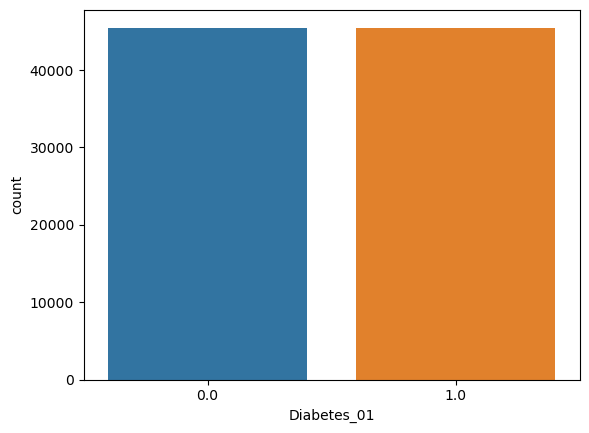

In [8]:
#target_count
sns.countplot(data = diabetes, x = 'Diabetes_01')

Due to the previous step we took while cleaning the data, the target counts are perfectly balanced. (0= no diabetes, 1= diabetes) 

In [9]:
diabetes.groupby(['Diabetes_01']).mean()

,Smoker,BMI,Stroke,HeartAttack,PhysActivity,HvyAlcoholConsump,GenHlth,MEDCOST1,Insurance,MentHlth,PhysHlth,DiffWalk,SEXVAR,Age,Education,Income,Blind,Kidney_disease
Diabetes_01,,,,,,,,,,,,,,,,,,
0.0,0.396224,28.130470,0.031475,0.041959,0.805460,0.077895,2.399675,0.080445,0.948458,4.215750,3.641229,0.114843,0.494648,7.232587,5.163176,7.126646,0.041915,0.030881
1.0,0.475548,31.881685,0.090336,0.133130,0.638306,0.034244,3.179155,0.082731,0.971800,5.010023,7.365870,0.327406,0.519749,9.333714,4.909686,6.129349,0.098072,0.122975


We can understand the basic relationship between the features and the target through this table. For instance, we can see that patients with diabetes, on average, have higher BMI, are more likely to be smokers, have worse physical, mental and general health. From common knowledge, this is an expected pattern of relationship. 

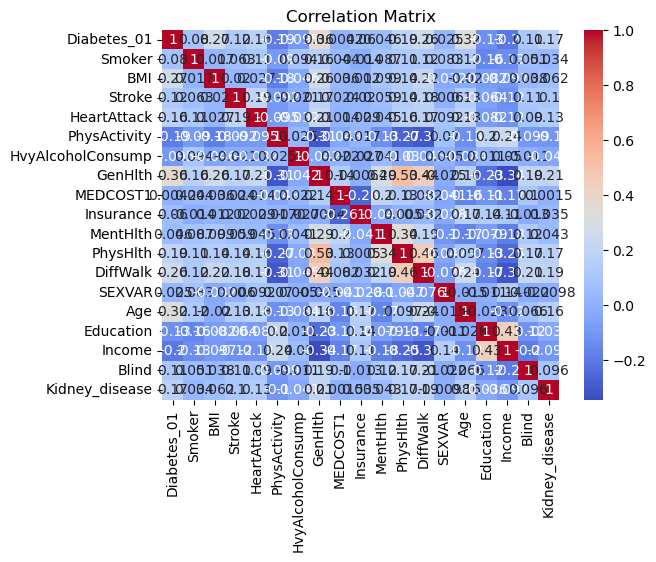

In [10]:
#correlation_matrix
correlation_matrix = diabetes.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

From this matrix, age and general health seem to have the strongest relationship (even though it is a 'weak correlation' in terms of magnitude) with the target variable (diabetes) out of all the factors. This implies that individuals who are older and individuals who have poor general health levels are more likely to acquire diabetes. It might be useful to look at scatterplots of age vs diabetes and general health vs diabetes to visualize the relationship.<br>
Additionally, there seems to be a strong relationship between physical health and general health, as well as difficulty in walking and general health. Since these are variables are highly correlated, I would also like to compare the performance of models with all three variables and with just the general health variable included when I create models in the next section. This might be helpful in dealing with th problem of multicollinearity in a logistic regression model.

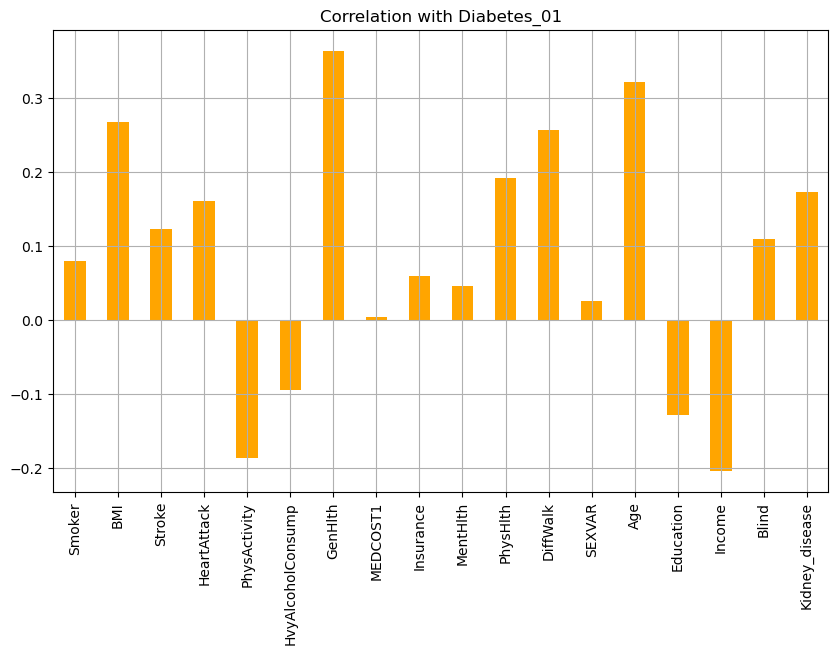

In [11]:
#correlation with diabetes through bar graph
diabetes.drop('Diabetes_01', axis=1).corrwith(diabetes.Diabetes_01).plot(kind='bar', grid=True, figsize=(10, 6)
,title="Correlation with Diabetes_01",color="Orange");


This is an easier way to visualise the correlation between the target variable and all other features. Not being able to afford a doctor (medcost), sex of the patient, and mental health seem to have the least correlation with diabetes. <br> <br>

Now, let's look at diabetes' relationship with some factors that stood out from the correlation heatmap and some factors that seem to have the weakest relationship with diabetes based on the bar graph above.

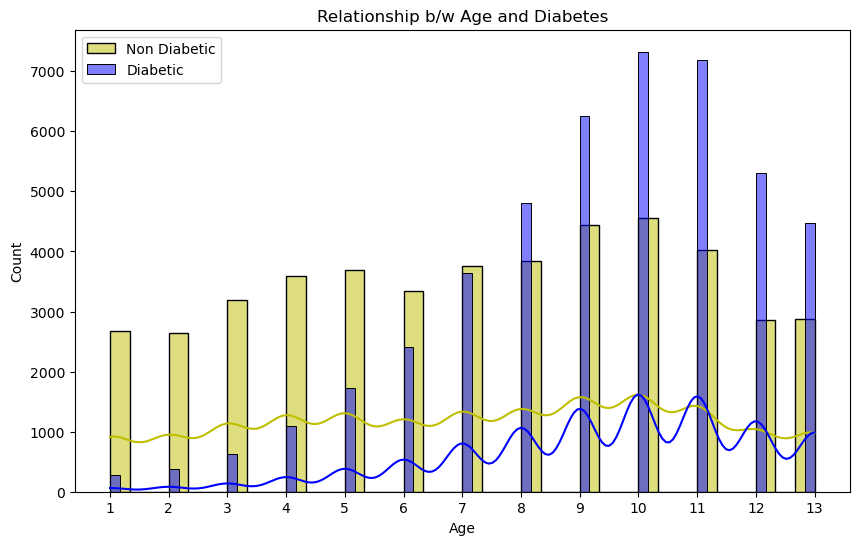

In [12]:
#age's effect on diabetes
plt.figure(figsize=(10, 6))
sns.histplot(diabetes.Age[diabetes.Diabetes_01 == 0], color="y", label="Non Diabetic" , kde = True )
sns.histplot(diabetes.Age[diabetes.Diabetes_01 == 1], color="b", label="Diabetic" , kde = True )
plt.title("Relationship b/w Age and Diabetes")

plt.xticks(diabetes["Age"].unique())
plt.legend()

*index- 1- Age 18 to 24 , 2- Age 25 to 29 , 3- Age 30 to 34 , 4- Age 35 to 39 , 5- Age 40 to 44 , 6- Age 45 to 49 , 7- Age 50 to 54 , 8- Age 55 to 59 , 9- Age 60 to 64 , 10- Age 65 to 69 , 11- Age 70 to 74 , 12- Age 75 to 79 , 13- Age 80 or older*


From this plot, we are able to see that as the sample gets older, the proportion of diabetic patients to non-diabetic patients increases. Approximately, people aged 50yrs and above are more vulnerable for diabetes than younger people. 

In [13]:
#general health's effect on diabetes
pd.crosstab(diabetes.GenHlth,diabetes.Diabetes_01)

Diabetes_01,0.0,1.0
GenHlth,,
1.0,8547,1857
2.0,17323,9315
3.0,13783,17797
4.0,4584,11876
5.0,1260,4652


*gen health index- 1: Excellent, 2: Very Good, 3: Good, 4: Fair, 5: Poor*

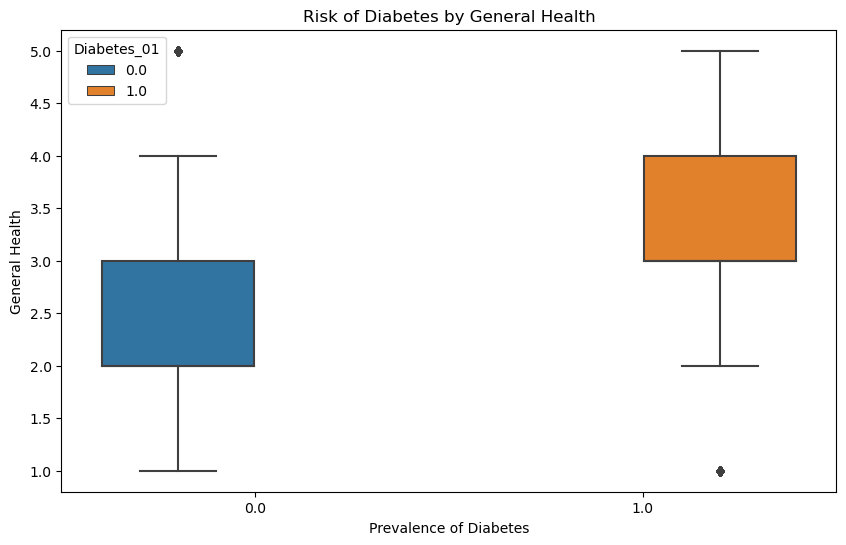

In [16]:
#general health's effect on diabetes
plt.figure(figsize = (10,6))
sns.boxplot(data= diabetes, x = 'Diabetes_01', y = 'GenHlth', hue = 'Diabetes_01')
plt.title('Risk of Diabetes by General Health')
plt.ylabel('General Health')
plt.xlabel('Prevalence of Diabetes');

From this plot, we can infer that people who are diabetic have reported poorer levels of general health than people who are non-diabetic.

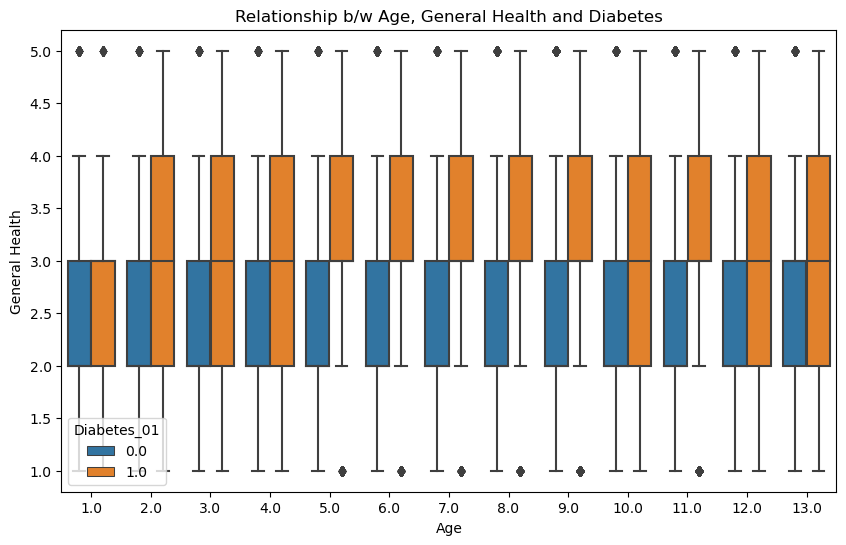

In [17]:
#age and general health together
plt.figure(figsize = (10,6))
sns.boxplot(data= diabetes, x = 'Age', y = 'GenHlth', hue = 'Diabetes_01')
plt.title('Relationship b/w Age, General Health and Diabetes')
plt.ylabel('General Health')
plt.xlabel('Age');

 Older diabetic patients have worse general health than younger diabetic patients.

According to the correlation bar plot, alcohol consumption seems to be negatively correlated with diabetes risk (which is strange).However, as expected, smoking seems to be mildly positively correlated with diabetes risk.  Therefore, I want to look at smoking and alcohol together to see if their combined effect increases the risk of diabetes.

Text(0.5, 1.0, 'Relationship b/w Smoking, Heavy Alc Consumptio and Diabetes')

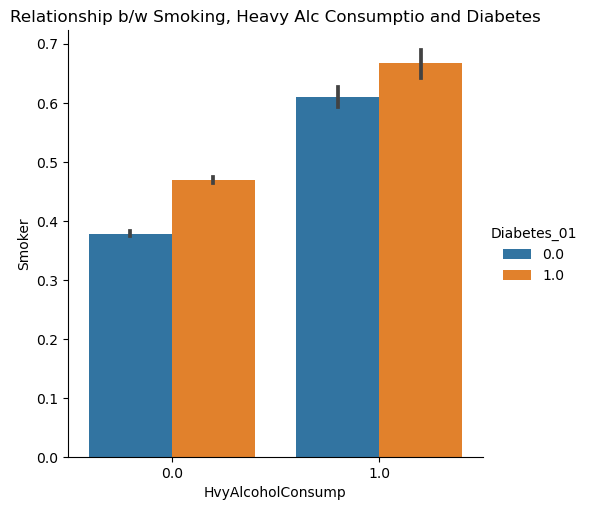

In [18]:
#smoking and heavy alcohol consumption's combined effect on diabetes
sns.catplot(x="HvyAlcoholConsump" , y ="Smoker" , data = diabetes , hue="Diabetes_01"  , kind="bar"  );  
plt.title("Relationship b/w Smoking, Heavy Alc Consumptio and Diabetes")


Text(0.5, 1.0, 'Relationship b/w Stroke, Heart Health and Diabetes')

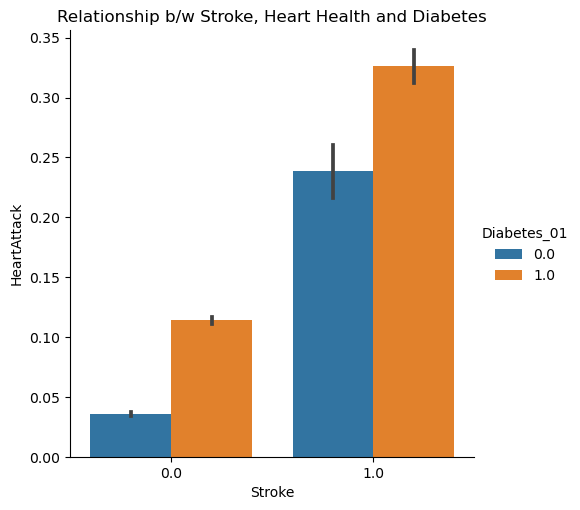

In [19]:
#stroke and heart attack's combined effect on diabetes
sns.catplot(x="Stroke" , y ="HeartAttack" , data = diabetes , hue="Diabetes_01"  , kind="bar"  );  
plt.title("Relationship b/w Stroke, Heart Health and Diabetes")

From these 2 graphs above, it seems like smoking & alcohol together and stroke & heart health together are associated with an increased risk of diabetes.

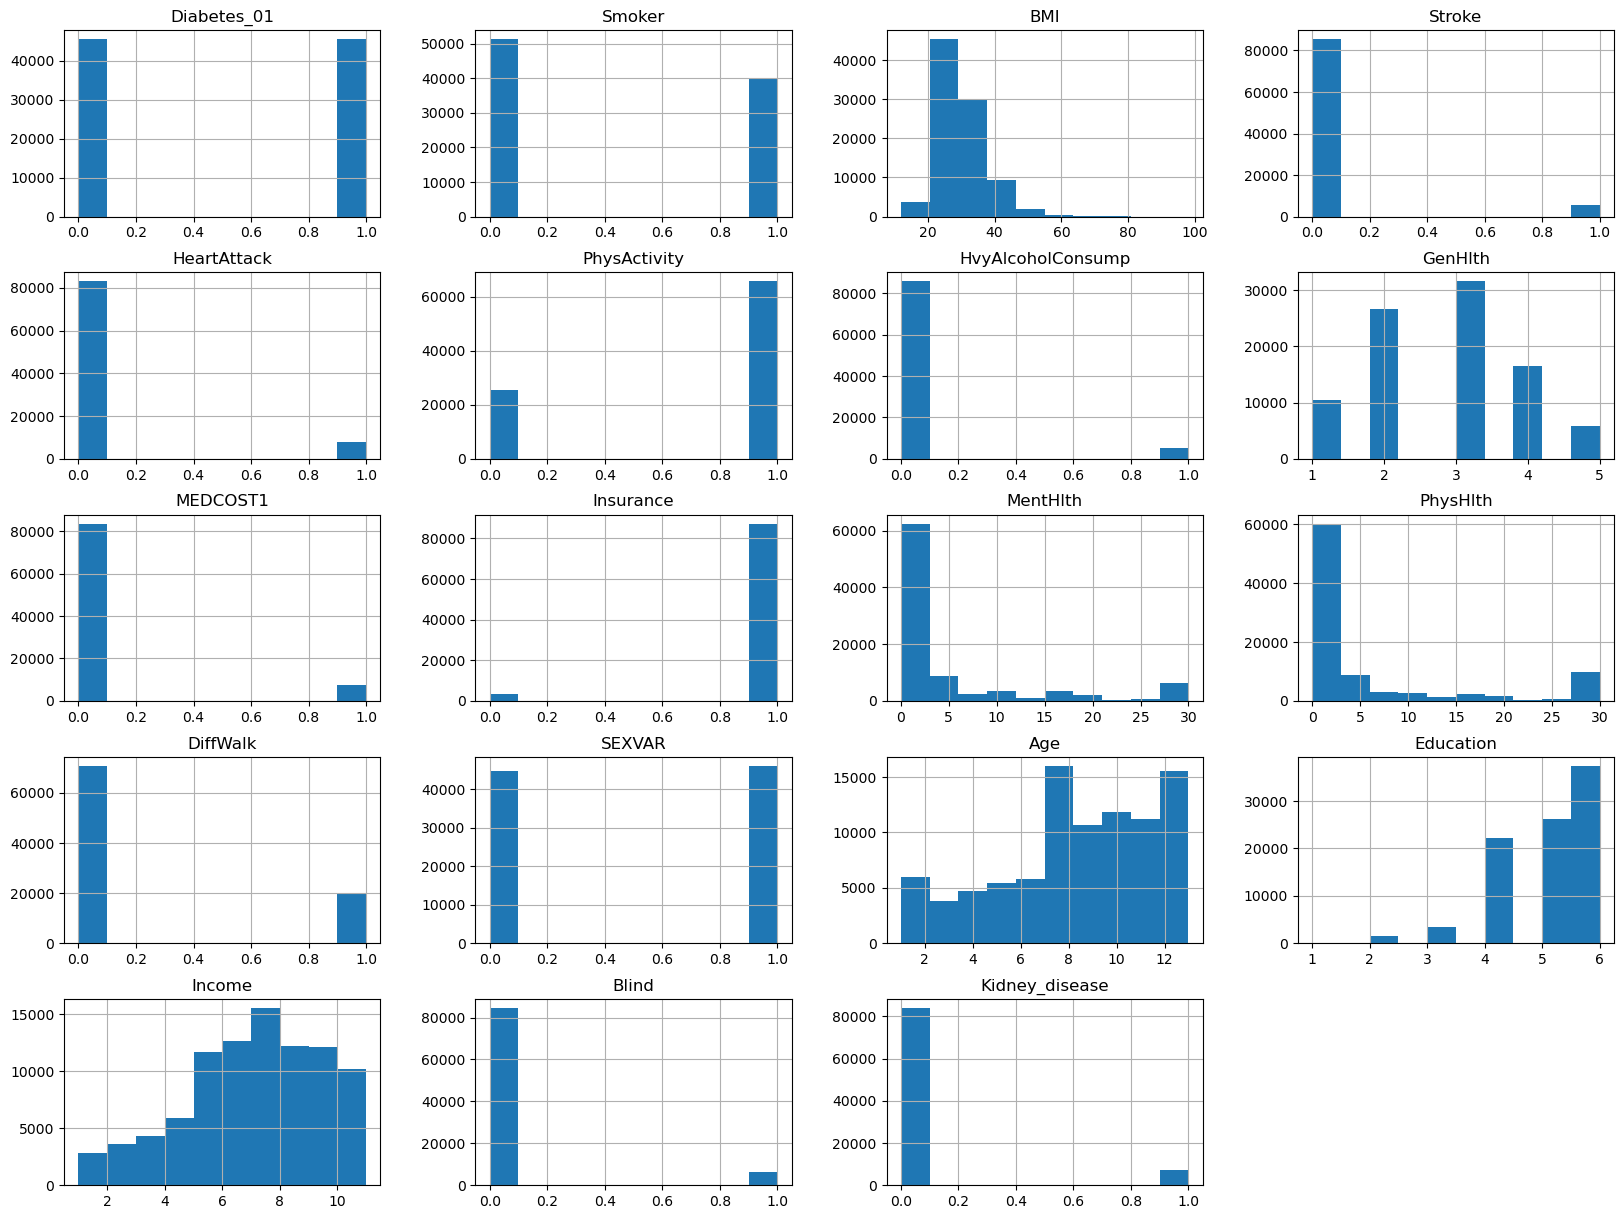

In [20]:
#using histogram to understand the distribution of the dataset better
diabetes.hist(figsize=(20,15));


Main takeaways from exploratory analysis:
1. Features that are strongly associated with diabetes risk are Age, General Health, Physical Health, and BMI <br>
2. Feature variables which increase the risk of diabetes together are : Smoking and HvyAlcoholConsump, and Stroke and Heart Health <br>
3. Features with the weakest associations with diabetes are mental health, sex, and ability to afford healthcare <br>
4. As we can see, there are many relationships that lead to diabetes in a patient, and while most of these are valid, we must be careful to ensure we remove the variables that are unnecessary/repetitive to end up with the best model. Since the relationships I have explored till now are purely correlational, it is best to try creating models with and without certain variables to see what works the best.<br>
5. On that note, I will compare the performance of my model with all three health variables and with just the general health variable to see if it makes a difference. I might also remove the variables with weak associations to diabetes to see if it makes my model better.

## Building Models

### Model 1 & 2- Logistic Regression Model & KNN

**Logistic**

In [21]:
#define X and y & train/test split
X = diabetes.drop('Diabetes_01', axis=1)
y = diabetes['Diabetes_01']
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=22)

In [22]:
#pipeline for logistic to scale and model
lgr_pipeline= Pipeline([('scale', StandardScaler()), ('model', LogisticRegression())])

In [23]:
#fit
lgr_pipeline.fit(X_train, y_train)

Pipeline(steps=[('scale', StandardScaler()), ('model', LogisticRegression())])

In [24]:
# score on train and test
print(f'Train Score: {lgr_pipeline.score(X_train, y_train)}')
print(f'Test Score: {lgr_pipeline.score(X_test, y_test)}')

Train Score: 0.7275697853322588
Test Score: 0.7184052046243791


In [25]:
#compare to baseline
y_train.value_counts(normalize=True)

0.0    0.501136
1.0    0.498864
Name: Diabetes_01, dtype: float64

The baseline prediction is that if we guess that a person is not diabetic every time, we would be right 50% of the time. **This model performed much better than the baseline--both the train and test scores are higher than the baseline.**

In [26]:
log_pred = lgr_pipeline.predict(X_test)
# Evaluate the model
accuracy = accuracy_score(y_test, log_pred)
print(f"Logistic Regression Accuracy: {accuracy}")

Logistic Regression Accuracy: 0.7184052046243791


Since our goal  is prediction, we want to estimate how accurately our predictive model will perform in practice. Cross validation is a resampling method that allows us to do so.

In [27]:
#cross_validation
cross_val_score(lgr_pipeline, X_train, y_train, cv=5)


array([0.72796542, 0.72635358, 0.7271595 , 0.7290644 , 0.72752583])

Here, we are not just looking for high scores but also consistency among all scores, so our model seems to be doing well on that front.

In [28]:
#coefficients
coefficients=lgr_pipeline.named_steps['model'].coef_[0]
feature_names=X_train.columns
coefficients_diabetes = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
print(coefficients_diabetes)

              Feature  Coefficient
0              Smoker    -0.014925
1                 BMI     0.575854
2              Stroke     0.059206
3         HeartAttack     0.096231
4        PhysActivity    -0.070863
5   HvyAlcoholConsump    -0.130298
6             GenHlth     0.573961
7            MEDCOST1     0.004314
8           Insurance     0.049705
9            MentHlth    -0.011945
10           PhysHlth    -0.060633
11           DiffWalk     0.032495
12             SEXVAR     0.128942
13                Age     0.678392
14          Education    -0.044121
15             Income    -0.139360
16              Blind     0.059749
17     Kidney_disease     0.183093


Each variable in the logistic regression equation has a coefficient. These coefficients represent the log-odds change in the target variable (diabetes) for a one-unit change in the predictor variable, assuming all other variables are held constant. However, a logistic regression assumes a log-linear relationship between predictors and the log-odds of the event. Therefore, it's unsure whether these coefficients are completely meaningful since we have not tested whether the assumptions of logistic regression have been met in this context. 

**KNN**


In [29]:
#pipeline for knn to scale and model
knn_pipe=Pipeline([('scale', StandardScaler()), ('model', KNeighborsClassifier())])

In [30]:
#fit
knn_pipe.fit(X_train, y_train)

Pipeline(steps=[('scale', StandardScaler()), ('model', KNeighborsClassifier())])

In [31]:
# score on train and test
print(f'Train Score: {knn_pipe.score(X_train, y_train)}')
print(f'Test Score: {knn_pipe.score(X_test, y_test)}')

Train Score: 0.785083156275185
Test Score: 0.6849531847553738


**It looks like the test score for this model is lower than the logistic regression model. But that doesn't necessarily mean this model is worse than the log reg model. We can compare the confusion matrix display for both to evaluate their performance.**

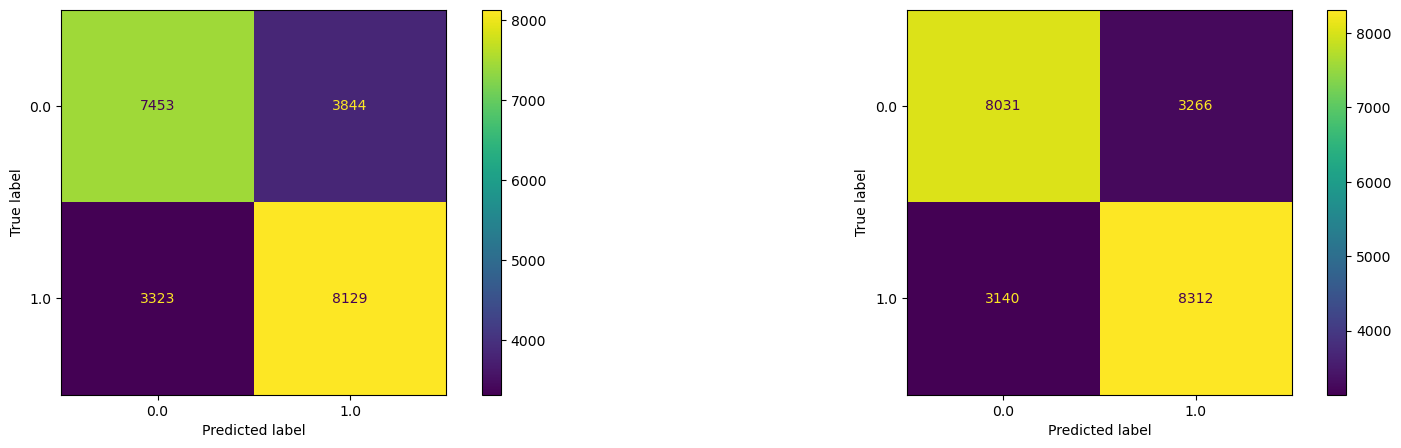

In [32]:
#side by side confusion matrix display for knn and logistic
fig, ax= plt.subplots(1, 2, figsize= (20,5))
ConfusionMatrixDisplay.from_estimator(knn_pipe, X_test, y_test, ax= ax[0])
ConfusionMatrixDisplay.from_estimator(lgr_pipeline, X_test, y_test, ax= ax[1])

**The error we care about/want to prevent the most is predicting no diabetes (0) when the patient actually has diabetes. In terms of this, it looks like the logistic regression model (on the right) is doing better since it is making those errors lesser number of times than the knn model.**

In [34]:
#cross_validation for knn model
cross_val_score(knn_pipe, X_train, y_train, cv=5)

array([0.68928127, 0.68979412, 0.68957433, 0.69155249, 0.69140596])

Here, we are not just looking for high scores but also consistency among all scores, so our model seems to be doing well on that front.

### Model 3- Random Forest Classifier

In [35]:
#instantiate and fit
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train,y_train)


RandomForestClassifier()

In [36]:
#train score
model.score(X_train, y_train)

0.9821378855593816

In [37]:
#test score
model.score(X_test, y_test)

0.7077234164139083

The model did better than the baseline. However, it looks like its overfit since it fit really well on the train data but not as well on the test data.

In [38]:
#baseline
y_train.value_counts(normalize=True)

0.0    0.501136
1.0    0.498864
Name: Diabetes_01, dtype: float64

In [49]:
#feature_importance
pd.DataFrame({'importance':model.feature_importances_}, index= X_train.columns).sort_values(by = 'importance', ascending = False)

,importance
BMI,0.193608
Age,0.179534
Income,0.119457
GenHlth,0.099701
PhysHlth,0.082642
MentHlth,0.071944
Education,0.062731
Smoker,0.031062
DiffWalk,0.029731
SEXVAR,0.027504


It looks like **BMI, Age, Income and General Health** rank high in terms of feature importance. These ranks are mostly in line with the "strong features" identified at the beginning, during the exploratory analysis. However, it is important to be aware that feature importance values are calculated based on  how frequently a feature or a column was used to split the data. 
Binary features only get split once, whereas continuous features could get split many times thereby inflating its feature importance. Since income and age are continuous and most of the other features are binary, we need to exercise caution while interpreting feature importances for this random forest model. Looking at **agnostic methods** like **partial dependence plots** could be an appropriate next step.


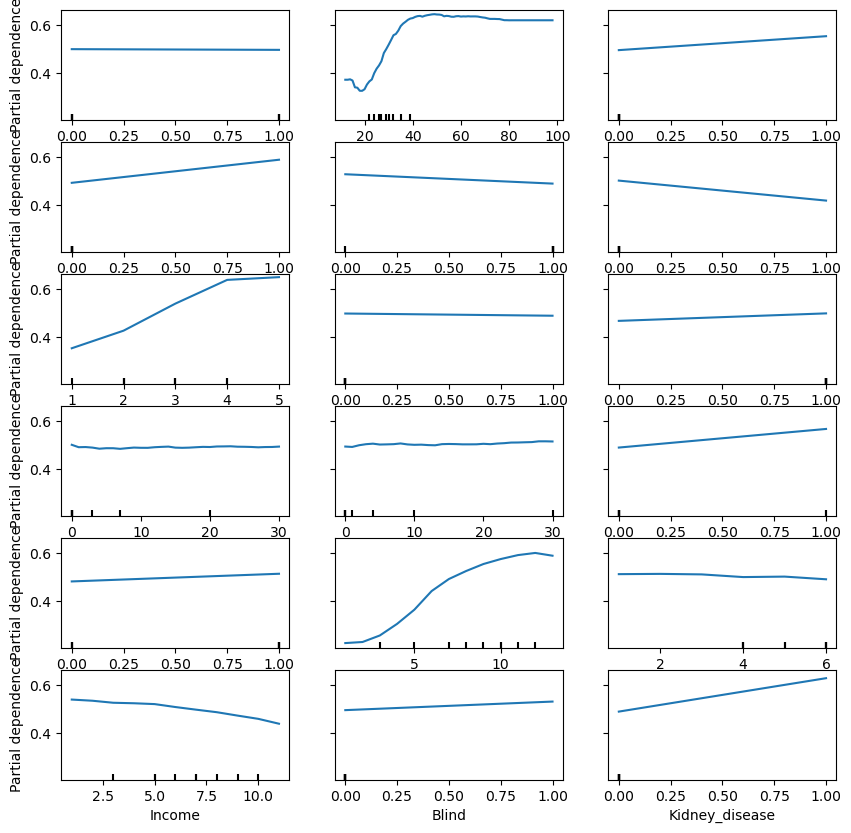

In [53]:
#partial dependence plots
from sklearn.inspection import PartialDependenceDisplay
fig, ax = plt.subplots(figsize=(10,10))
PartialDependenceDisplay.from_estimator(model,X_train,features= X_train.columns, ax=ax)

In [40]:
#gridsearchcv
param_dist = {
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2,4]
}


grid_cv = GridSearchCV(model,param_grid=param_dist, cv=5)


# Train the model
grid_cv.fit(X_train, y_train)



GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 4, 5], 'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

In [42]:
#train score
grid_cv.score(X_train, y_train)

0.7201113634698513

In [43]:
#test score
grid_cv.score(X_test, y_test)

0.7125587937931338

In [44]:
grid_cv.best_params_

{'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 10}

GridSearchCV performs cross validation for multiple models with the data you fit it with. It saves the best performing model and refits it on all the data you pass it. It looks like the train score fell but the test score improved after performing grid search cv.

### Model 4- Boosted Models- GradientBoostingClassifier and xgboost

In [54]:
#gradient boosting classifier
from sklearn.ensemble import GradientBoostingClassifier
gboost =  GradientBoostingClassifier()

In [55]:
# fit and score
gboost.fit(X_train, y_train)
gboost.score(X_test, y_test)

0.7256143127170425

In [56]:
#xgboost
!pip install xgboost

In [57]:
import xgboost as xgb

In [59]:
#instantiate
xboost = xgb.XGBClassifier(n_estimators = 10, max_depth = 2)

In [60]:
# score it
xboost.fit(X_train, y_train)
xboost.score(X_train, y_train)

0.7232471243314529

In [62]:
xboost.score(X_test, y_test)

0.7189766583146512

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

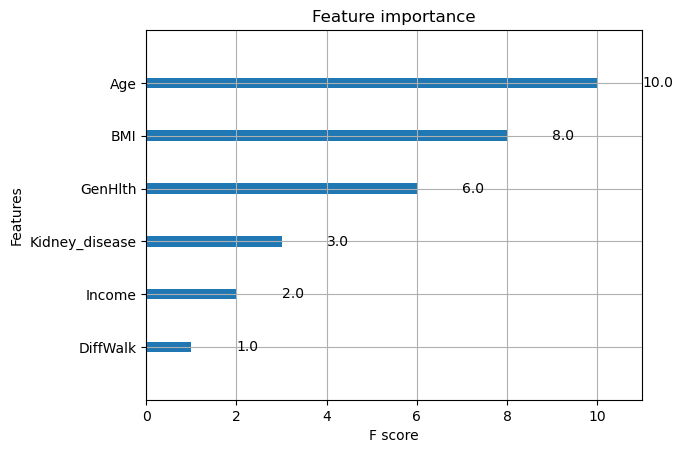

In [63]:
xgb.plot_importance(xboost)

Boosted models did the best in terms of test scores. According to the feature importance plot, age, bmi, general health and kidney disease seem to be the most important fetaures in this xgboost model and have the most power in explaining why the model is predicting what it is predicting.

## Conclusion

As we observed, all the models we used on the data came back with better scores than the baseline predictions. The boosted models performed the best in comparison to log reg, knn and random forest. Though the models did not get perfect score, they performed better than the baseline implying that there is room for improvement. Some future directions could be doing selective feature elimination and testing different types of models and parameters through grid search. It might also be that the nature of the dataset is such that there are some drawbacks. For eg, the dataset did not have information about blood pressure and cholestrol which are said to be important factors for diabetes.